In [41]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.ensemble import BaggingClassifier

In [42]:
df = pd.read_csv("LoanApprovalPrediction.csv") 

In [43]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0.0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3.0,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2.0,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1.0,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [44]:
#Find all variables
df.columns.tolist()

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [45]:
#Variable Descriptions 
#Loan_ID = unique id for each loan request 
#Gender = M or F
#Married = whether the applicant is married or not
#Dependents = how many dependents the applicant has
#Education = graduated high school (assuming high school) or not 
#Self_Employed = is applicant self employed or not 
#Applicant Income = monthly income of applicant 
#Coapplicant Income = monthly income of coapplicant 
#Loan Amount = amount for loan in thousands
#Loan_Amount_Term = term of loan in months 
#Credit_History = credit history of applicant
#Propery_Area = area of propery in terms of rural/urban/semi-urban
#Loan_Status = Y or N if loan is approved or not 

In [46]:
#Loan Status is our response/output 
response = df[df.columns[-1]]
response

0      Y
1      N
2      Y
3      Y
4      Y
      ..
593    Y
594    Y
595    Y
596    Y
597    N
Name: Loan_Status, Length: 598, dtype: object

In [47]:
#Loan_ID is unnecessary for data analysis, can drop it
df.drop(['Loan_ID'], axis=1, inplace=True)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
593,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
594,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
595,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
596,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [48]:
#EDA 

In [49]:
#Check for Null values
df.isnull().sum()

Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [50]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,586.000000,598.000000,598.000000,577.000000,584.000000,549.000000
mean,0.755973,5292.252508,1631.499866,144.968804,341.917808,0.843352
std,1.007751,5807.265364,2953.315785,82.704182,65.205994,0.363800
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3806.000000,1211.500000,127.000000,360.000000,1.000000
75%,1.750000,5746.000000,2324.000000,167.000000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,650.000000,480.000000,1.000000


In [51]:
#Dependents, Loan Amount, Loan Amount Term, and Credit History all have null values 
#Filling those nan values with 0's 
df.fillna(0, inplace = True)

In [52]:
#Changing Categorical variables to Binary variables using LabelEncoder
LE = preprocessing.LabelEncoder()
obj = df.dtypes == 'object'
for col in list(obj[obj].index):
    df[col] = LE.fit_transform(df[col])

In [53]:
#Check Data after label encoding
df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,0.0,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2.0,0,1,5417,4196.0,267.0,360.0,1.0,2,1
6,1,1,0.0,1,0,2333,1516.0,95.0,360.0,1.0,2,1
7,1,1,3.0,0,0,3036,2504.0,158.0,360.0,0.0,1,0
8,1,1,2.0,0,0,4006,1526.0,168.0,360.0,1.0,2,1
9,1,1,1.0,0,0,12841,10968.0,349.0,360.0,1.0,1,0


In [54]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,0.0,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
593,0,0,0.0,0,0,2900,0.0,71.0,360.0,1.0,0,1
594,1,1,3.0,0,0,4106,0.0,40.0,180.0,1.0,0,1
595,1,1,1.0,0,0,8072,240.0,253.0,360.0,1.0,2,1
596,1,1,2.0,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [55]:
#Categorical Variables are successfully converted

Text(0.5, 1.0, 'Correlation Plot of all variables')

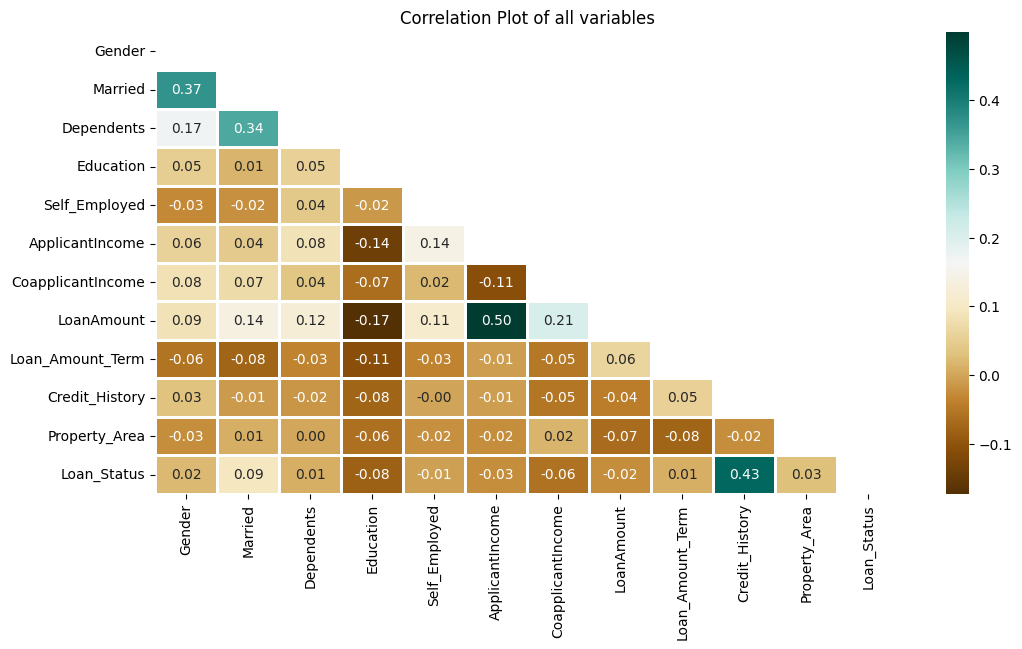

In [56]:
#CorrPlot for all variables
#Create a lower mask to plot the lower triangle of corrplot
mask = np.triu(np.ones_like(df.corr(), dtype = bool))

plt.figure(figsize = (12, 6))
sns.heatmap(df.corr(), mask = mask, cmap = 'BrBG', fmt='.2f', linewidths=1,annot=True)
plt.title("Correlation Plot of all variables") 

In [57]:
#According to the Corrplot:
#Credit_History seems to have the most statistically sig. impact on Loan_Status, with a correlation = 0.43

Text(0.5, 1.0, 'Loan Amount Distribution Plot')

<Figure size 1000x1000 with 0 Axes>

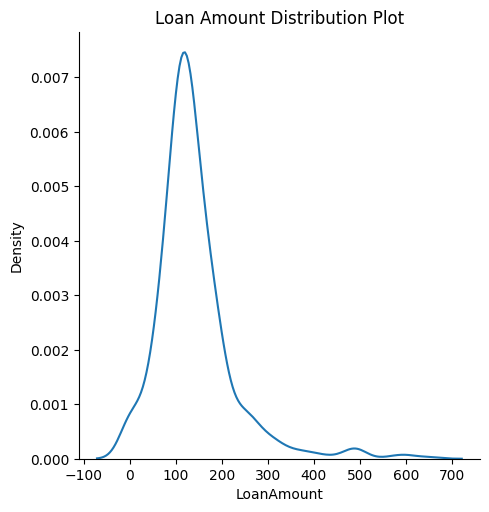

In [58]:
#Loan_Amount DistPlot
plt.figure(figsize = (10,10))
sns.displot(df['LoanAmount'], kind = 'kde')
plt.title("Loan Amount Distribution Plot") 

Text(0.5, 1.0, 'Applicant Income Distribution Plot')

<Figure size 1000x1000 with 0 Axes>

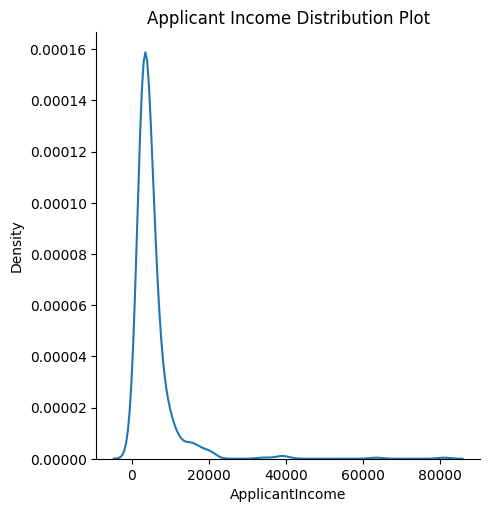

In [59]:
#Applicant Income Dist Plot
plt.figure(figsize = (10,10))
sns.displot(df["ApplicantIncome"], kind = "kde")
plt.title("Applicant Income Distribution Plot")

81.4

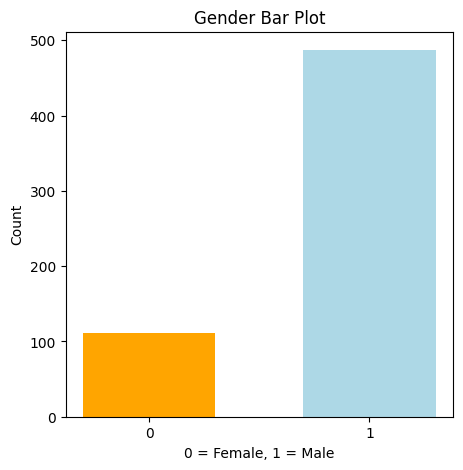

In [60]:
#Gender Bar Plot
gender_counts = df['Gender'].value_counts()
colors = ['lightblue', 'orange']

plt.figure(figsize = (5,5))
plt.bar(gender_counts.index, gender_counts, color=colors, width = 0.6)
plt.title('Gender Bar Plot')
plt.xticks([0,1])
plt.xlabel('0 = Female, 1 = Male')
plt.ylabel('Count')
gender_counts

round((int(gender_counts[1]) / (int(gender_counts[0]) + int(gender_counts[1]))) * 100, 1)

Dependents
0.0    350
1.0    101
2.0     99
3.0     48
Name: count, dtype: int64

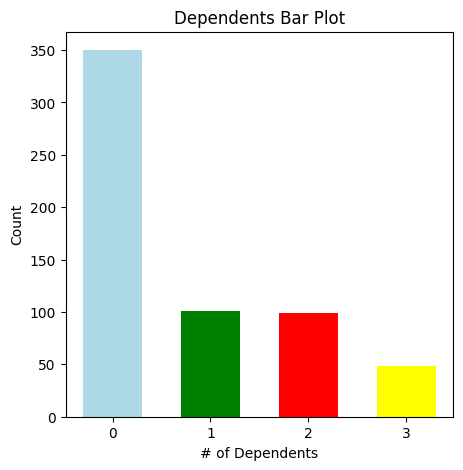

In [61]:
#Gender Bar Plot
dependents_counts = df['Dependents'].value_counts()
colors = ['lightblue', 'green', 'red', 'yellow']

plt.figure(figsize = (5,5))
plt.bar(dependents_counts.index, dependents_counts, color=colors, width = 0.6)
plt.title('Dependents Bar Plot')
plt.xticks([0,1,2,3])
plt.xlabel('# of Dependents')
plt.ylabel('Count')
dependents_counts

64.9

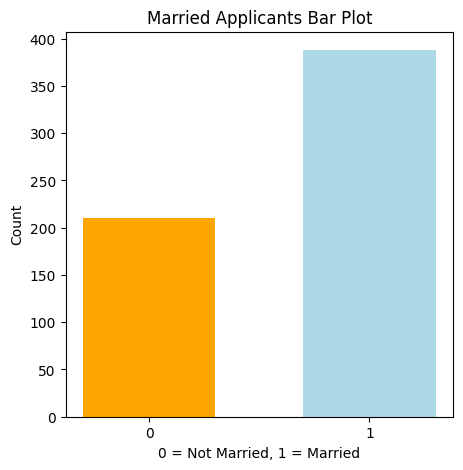

In [62]:
#Married Bar Plot
married_counts = df['Married'].value_counts()
colors = ['lightblue', 'orange']

plt.figure(figsize = (5,5))
plt.bar(married_counts.index, married_counts, color=colors, width = 0.6)
plt.title('Married Applicants Bar Plot')
plt.xticks([0,1])
plt.xlabel('0 = Not Married, 1 = Married')
plt.ylabel('Count')
married_counts

round((int(married_counts[1]) / (int(married_counts[0]) + int(married_counts[1]))) * 100, 1)

[29.3, 37.6, 33.1]

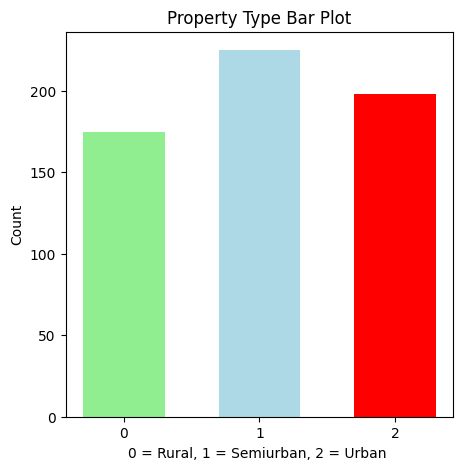

In [63]:
#Property Area Bar Plot
prop_area_counts = df['Property_Area'].value_counts()
colors = ['lightblue', 'red', 'lightgreen']

plt.figure(figsize = (5,5))
plt.bar(prop_area_counts.index, prop_area_counts, color=colors, width = 0.6)
plt.title('Property Type Bar Plot')
plt.xticks([0,1,2])
plt.xlabel('0 = Rural, 1 = Semiurban, 2 = Urban ')
plt.ylabel('Count')
prop_area_counts

[round((int(prop_area_counts[0]) / (int(prop_area_counts[0]) + int(prop_area_counts[1]) + int(prop_area_counts[2]))) * 100, 1),
round((int(prop_area_counts[1]) / (int(prop_area_counts[0]) + int(prop_area_counts[1]) + int(prop_area_counts[2]))) * 100, 1),
round((int(prop_area_counts[2]) / (int(prop_area_counts[0]) + int(prop_area_counts[1]) + int(prop_area_counts[2]))) * 100, 1)]

77.8

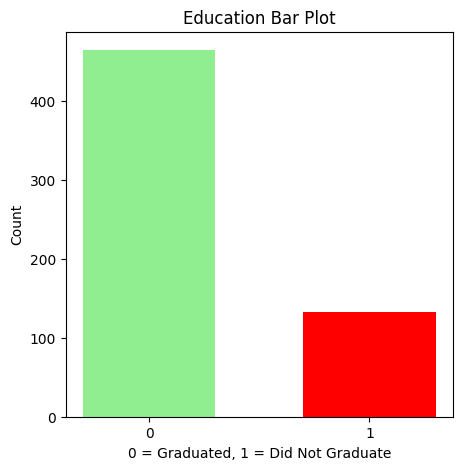

In [64]:
#Education Bar Plot
education_counts = df['Education'].value_counts()
colors = ['lightgreen', 'red']

plt.figure(figsize = (5,5))
plt.bar(education_counts.index, education_counts, color=colors, width = 0.6)
plt.title('Education Bar Plot')
plt.xticks([0,1])
plt.xlabel('0 = Graduated, 1 = Did Not Graduate')
plt.ylabel('Count')
education_counts

round((int(education_counts[0]) / (int(education_counts[0]) + int(education_counts[1]))) * 100, 1)

18.4

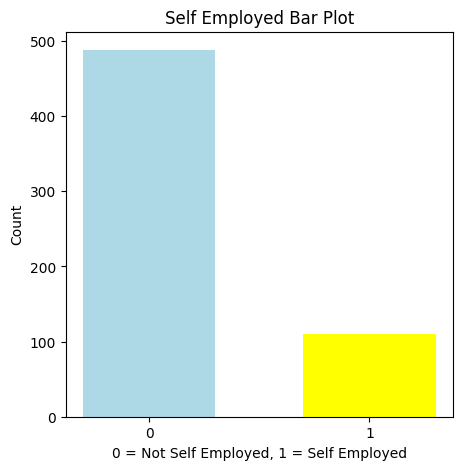

In [65]:
#Self Employed Bar Plot
self_emp_counts = df['Self_Employed'].value_counts()
colors = ['lightblue', 'yellow']

plt.figure(figsize = (5,5))
plt.bar(self_emp_counts.index, self_emp_counts, color=colors, width = 0.6)
plt.title('Self Employed Bar Plot')
plt.xticks([0,1])
plt.xlabel('0 = Not Self Employed, 1 = Self Employed')
plt.ylabel('Count')
self_emp_counts

round((int(self_emp_counts[1]) / (int(self_emp_counts[0]) + int(self_emp_counts[1]))) * 100, 1)

68.7

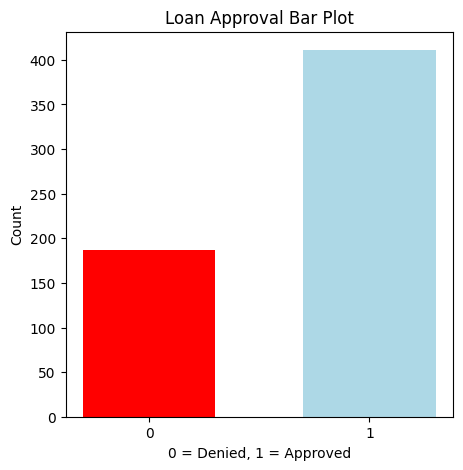

In [66]:
#Loan Approval Bar Plot
approval_counts = df['Loan_Status'].value_counts()
colors = ['lightblue', 'red']

plt.figure(figsize = (5,5))
plt.bar(approval_counts.index, approval_counts, color=colors, width = 0.6)
plt.title('Loan Approval Bar Plot')
plt.xticks([0,1])
plt.xlabel('0 = Denied, 1 = Approved')
plt.ylabel('Count')
approval_counts

round((int(approval_counts[1]) / (int(approval_counts[0]) + int(approval_counts[1]))) * 100, 1)

In [67]:
#EDA Takeaways 
#Many more males in the dataset, 487 men, 111 women 
#Most Applicants had no dependents
#81.4% of Applicants are male
#64.9% of Applicants are married 
#77.8% of Applicants graduated from high school
#18.4% of Applicants are self employed
#Good variety of property type from applicants, with semiurban having a slight majority over urban and rural
#29.3% of property is rural, 37.6% of property is semi-urban, 33.1% of property is urban 
#68.7% of Loan Applications got approved

In [68]:
#Model Training

In [69]:
#Need to split data into train and test datasets
x = df.drop(['Loan_Status'], axis=1) 
y = df['Loan_Status']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [70]:
#Models to be used
#K-Nearest-Neighbors 
#SVM 
#Random Forest
#Gaussian Naive-Bayes 
#Neural Network

#Importing Necessary Libraries
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

#Accuracy Metrics to be Used
from sklearn.metrics import accuracy_score

In [71]:
#SVM
#Polynomial Kernel function provides the highest accuracy score
SVM = SVC(kernel = 'poly', random_state = 40)
SVM.fit(x_train, y_train) 
y_pred = SVM.predict(x_test)
svm_accuracy = accuracy_score(y_test, y_pred) * 100
svm_accuracy

70.0

In [72]:
#Random Forest
RF = RandomForestClassifier(random_state = 40)
RF.fit(x_train, y_train)
y_pred = RF.predict(x_test)
rf_accuracy = accuracy_score(y_test, y_pred) * 100
rf_accuracy

77.22222222222223

In [74]:
#Gaussian Naive-Bayes
NB = GaussianNB()
NB.fit(x_train, y_train)
y_pred = NB.predict(x_test)
nb_accuracy = accuracy_score(y_test, y_pred) * 100
nb_accuracy

77.22222222222223

In [75]:
#NN
#Standardize the data
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test) 

#Create Model
nn = Sequential([
    Dense(64, input_shape = (11,), activation = 'relu'), 
    Dropout(0.2),
    Dense(32, activation = 'relu'),
    Dropout(0.2), 
    Dense(16, activation = 'relu'),
    Dropout(0.2),
    Dense(1, activation = 'sigmoid')
])

nn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

history = nn.fit(x_train_std, y_train, epochs = 200, batch_size = 16, validation_data = (x_test_std, y_test))

loss, nn_accuracy = nn.evaluate(x_test_std, y_test)

C:\Users\Danny\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.6790 - loss: 0.6761 - val_accuracy: 0.6889 - val_loss: 0.6264
Epoch 2/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6993 - loss: 0.6041 - val_accuracy: 0.6889 - val_loss: 0.6112
Epoch 3/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6827 - loss: 0.6099 - val_accuracy: 0.6889 - val_loss: 0.6007
Epoch 4/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7062 - loss: 0.5605 - val_accuracy: 0.6889 - val_loss: 0.5874
Epoch 5/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6758 - loss: 0.6173 - val_accuracy: 0.6889 - val_loss: 0.5793
Epoch 6/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7012 - loss: 0.5821 - val_accuracy: 0.6889 - val_loss: 0.5745
Epoch 7/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7017 - loss: 0.5678 - val_accuracy: 0.6889 - val_loss: 0.5742
Epoch 8/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6411 - loss: 0.5935 - val_accuracy: 0.7000 - 

In [76]:
nn_acc = nn_accuracy * 100
print(nn_acc)

72.77777791023254


In [77]:
#K-Nearest-Neighbors
#Searching from neighbors (tuning k) 
#Also using standardized data
param_grid = {'n_neighbors': range(1, 20)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv = 5)
grid_search.fit(x_train_std, y_train)

print(f"Best k: {grid_search.best_params_['n_neighbors']}")

Best k: 16


C:\Users\Danny\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [78]:
#KNN with k = 16
k = 16
KNN = KNeighborsClassifier(n_neighbors = k)
KNN.fit(x_train_std, y_train)
y_pred = KNN.predict(x_test_std)
knn_accuracy = accuracy_score(y_test, y_pred) * 100
knn_accuracy

75.55555555555556

In [79]:
print(f"SVM Accuracy: {svm_accuracy:.2f}")
print(f"RF Accuracy: {rf_accuracy:.2f}")
print(f"NB Accuracy: {nb_accuracy:.2f}")
print(f"NN Accuracy: {nn_acc:.2f}")
print(f"KNN Accuracy: {knn_accuracy:.2f}")

SVM Accuracy: 70.00
RF Accuracy: 77.22
NB Accuracy: 77.22
NN Accuracy: 72.78
KNN Accuracy: 75.56


In [ ]:
#Before any other tuning, these are the models rank by accuracy  
#T-1: Naive-Bayes: 77.22% 
#T-1: Random Forest: 77.22% 
#3: K-Nearest Neighbor: 75.56%
#4: Neural Network: 72.78%
#5: Support Vector Machine, 70% 

In [ ]:
#Further tuning will be done to the following models:
#KNN
#Naive-Bayes
#Neural Network
#Random Forest

In [80]:
#KNN with a smaller param_grid range
#Searching from neighbors (tuning k) 
#Also using standardized data
param_grid = {'n_neighbors': range(1, 10)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv = 5)
grid_search.fit(x_train_std, y_train)

print(f"Best k: {grid_search.best_params_['n_neighbors']}")

Best k: 3


In [81]:
#KNN with k = 3
k = 3
KNN = KNeighborsClassifier(n_neighbors = k)
KNN.fit(x_train_std, y_train)
y_pred = KNN.predict(x_test_std)
knn_accuracy2 = accuracy_score(y_test, y_pred) * 100
knn_accuracy2

71.66666666666667

In [ ]:
#Smaller k lower accuracies, higher k ranges still return a k = 16

In [82]:
#Neural Network with different layer structure
#Also adding an adaptive learning rate

#Standardize the data
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test) 

#Create Model
nn2 = Sequential([
    Dense(64, input_shape = (11,), activation = 'relu'), 
    Dropout(0.2),
    Dense(32, activation = 'relu'),
    Dropout(0.2), 
    Dense(1, activation = 'sigmoid')
])

nn2.compile(optimizer = Adam(learning_rate = 0.001) , loss = 'binary_crossentropy', metrics = ['accuracy'])

adaptive_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.5, patience = 5, min_lr = 1e-6)

history2 = nn2.fit(x_train_std, y_train, epochs = 200, batch_size = 16, validation_data = (x_test_std, y_test), callbacks = [adaptive_lr])

loss, nn2_accuracy = nn2.evaluate(x_test_std, y_test)

Epoch 1/200


C:\Users\Danny\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.6450 - loss: 0.6554 - val_accuracy: 0.7000 - val_loss: 0.5893 - learning_rate: 0.0010
Epoch 2/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6957 - loss: 0.6333 - val_accuracy: 0.7278 - val_loss: 0.5724 - learning_rate: 0.0010
Epoch 3/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7198 - loss: 0.5655 - val_accuracy: 0.7500 - val_loss: 0.5652 - learning_rate: 0.0010
Epoch 4/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7582 - loss: 0.5566 - val_accuracy: 0.7667 - val_loss: 0.5561 - learning_rate: 0.0010
Epoch 5/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7240 - loss: 0.5726 - val_accuracy: 0.7722 - val_loss: 0.5504 - learning_rate: 0.0010
Epoch 6/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7363 - loss: 0.5573 - val_accuracy: 0.7778 - val_loss: 0.5547 - learning_rate: 0.0010
Epoch 7/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7623 - loss: 0.5318 - val_accuracy: 0.7

In [83]:
nn_opt_acc = nn2_accuracy * 100
print(nn_opt_acc)

77.22222208976746


In [85]:
#Naive Bayes with Bagging w/ 10 NB Classifiers 
Bagging_NB = BaggingClassifier(estimator = NB, n_estimators = 10, random_state = 40)
Bagging_NB.fit(x_train, y_train)
y_pred = Bagging_NB.predict(x_test)
bagging_nb_accuracy = accuracy_score(y_test, y_pred) * 100
bagging_nb_accuracy

78.88888888888889

In [96]:
#Random Forest with bootstrapping 
RF_Boot = RandomForestClassifier(n_estimators = 100, bootstrap = True, random_state = 42)
RF_Boot.fit(x_train, y_train)
y_pred = RF_Boot.predict(x_test)
rf_boot_accuracy = accuracy_score(y_test, y_pred) * 100
rf_boot_accuracy

76.66666666666667

In [97]:
#Full Model Rankings: 
accuracies = {'SVM Accuracy':svm_accuracy,
              'Neural Network Accuracy ':nn_acc, 
              'Optimized Neural Network Accuracy':nn_opt_acc, 
              'KNN Accuracy (k = 16)':knn_accuracy, 
              'KNN Accuracy (k = 3)':knn_accuracy2,
              'Random Forest Accuracy':rf_accuracy,
              'Naive Bayes Accuracy':nb_accuracy,
              'Bagging Naive Bayes Accuracy':bagging_nb_accuracy,
              'Bootstrap Random Forest Accuracy':rf_boot_accuracy}

In [98]:
#Listing the models in order of accuracies
for model, acc in sorted(accuracies.items(), key = lambda x: x[1], reverse = True):
    print(f'{model}: {acc:.2f}')

Bagging Naive Bayes Accuracy: 78.89
Random Forest Accuracy: 77.22
Naive Bayes Accuracy: 77.22
Optimized Neural Network Accuracy: 77.22
Bootstrap Random Forest Accuracy: 76.67
KNN Accuracy (k = 16): 75.56
Neural Network Accuracy : 72.78
KNN Accuracy (k = 3): 71.67
SVM Accuracy: 70.00


In [ ]:
#The Bagging NB Model is the most accurate at 78.89% 
#Random Forest, Standard Naive-Bayes, and an optimized Neural Network all are tied for the second highest accruacy
#Neural Network and Naive Bayes tuning improved their accuracies
#Random Forest and KNN tuning did not help the accuracy
#Overall, a Bagging Naive Bayes model would be recommended for Loan Prediction